In [57]:
# 당뇨병 환자의 데이터
from sklearn.datasets import load_diabetes
diabates = load_diabetes() 
# load로 시작하는 bunch class > 공부하라고 만들어놓은 녀석들 > data, target까지 지정되어있음
# 심지어 표준화까지 되어있음

In [58]:
# 데이터 확인
print(diabates.DESCR)
print(diabates.data.shape)
print(diabates.target.shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

> data는 442개의 행과 10개의 열로 구성된 2차원 배열   
> target은 442개의 요소를 가진 1차원 배열(442 뒤에 1이 없음)  
> 여기서 442개를 Sample갯수라고 하며 10개를 특성(Feature)갯수라고 함

In [59]:
print(diabates.feature_names)
print(diabates.data[:2])
# 그냥 다짜고짜 예측만 하면 됨

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]


In [60]:
diabates.target[:2]

array([151.,  75.])

## 데이터 시각화

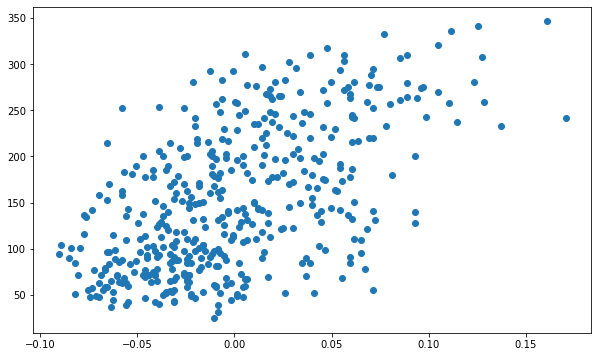

In [61]:
import matplotlib.pyplot as plt

# size
plt.figure(figsize=(10,6))

# 2번째 feature와 target 보기
plt.scatter(diabates.data[:,2], diabates.target)
plt.show()

In [62]:
# 상관계수 확인
import numpy as np
np.corrcoef(diabates.data[:,2], diabates.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

---
## 경사 하강법
- 모델(수식)이 데이터를 잘 표현할 수 있도록 기울기(변화율)을 사용해 모델을 조금씩 조정하는 최적화 알고리즘
- 요래조래 찍어보면서 변화율이 0이 되는 지점을 계속 탐색해감

## 예측값과 변화율
#### 예측값(y^)
- 하나의 모델에서 수식의 결과로 나온 값

#### 훈련데이터에서 잘 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정한다
2. x에서 샘플 하나를 선택하여 y^을 계산한다
3. y^과 선택한 샘플의 진짜 y를 비교(예측값과 정답 비교)해 오차를 구한다
4. y^이 y와 가까워지도록 w, b를 조정한다 (모델 조정하기: 학습하기)
5. 모든 샘플을 처리할 때까지 2~4 반복

## 나의 경사(변화율) = 현재 나의 x값
- 편미분 해보면 알 수 있음   
http://aikorea.org/cs231n/optimization-1/

- w_rate = y_pred_inc - y_pred / w_inc -w
- w_rate = (x[i]*w_inc + b) - (x[i]*w + b) / w_inc - w
- w_rate = x[i](w_inc - w) / w_inc - w
- w_rate = x[i]

- b_rate = y_pred_inc - y_pred / b_inc - b
- b_rate = (x[i]*w + b_inc) - (x[i]*w + b) / b_inc - b
- b_rate = b_inc - b / b_inc - b
- b_rate = 1

In [63]:
# 훈련데이터의 Feature와 Target 정하기

x = diabates.data[:,2]
y = diabates.target

# 5개만 출력해보기
print(x[:5])
print(y[:5])

# w와 b를 임의로 정하기
# w = np.random.randn()
# b = np.random.randn()
w = 1
b = 1

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [64]:
# 훈련데이터의 첫 번째 Sample 데이터로 y^ 계산하기
y_pred = x[0] * w + b
print(y_pred)

1.0616962065186886


In [65]:
# Target과 y_pred의 차이를 오차로 하기
y_pred_error = y[0] - y_pred
print(y_pred_error)

149.9383037934813


> Target과 예측값 차이가 매우 큼
### w값을 조절하기
- w와 b를 조금씩 변경해서 y_pred(y_hat)이 증가하는지 감소하는지 살펴보기

#### 오차 역전파로 가중치의 절편을 업데이트 > 손실함수(비용함수)를 구성
#### 오차 역전파(backpropagation)는 y^과 y의 차이를 이용하여 w와 b를 업데이트 하는 것

In [66]:
w_new = w + x[0]
b_new = b + 1

# 오차와 변화율을 곱하여 가중치 업데이트 하기

w_new = w + x[0] * y_pred_error
b_new = b + 1 * y_pred_error
print(w_new, b_new)

10.250624555904478 150.9383037934813


In [67]:
# 1번째 샘플 (x[1])을 사용하여 새로운 오차를 구하고 새로운 w와 b를 구하기
y_pred = x[1] * w_new + b_new
y_pred_error = y[1] - y_pred
print(y_pred_error)
# 오차율이 149 > -75로 줄어들었음

w_new = w_new + x[1] * y_pred_error
b_new = b_new + 1 * y_pred_error
print(w_new, b_new)

-75.41066251735467
14.132317616381732 75.52764127612664


In [68]:
# 2번째 샘플 (x[2])을 사용하여 새로운 오차를 구하고 새로운 w와 b를 구하기
y_pred = x[2] * w_new + b_new
y_pred_error = y[2] - y_pred
print(y_pred_error)
# 오차율이 -75 > -64.8로 줄어들었음

w_new = w_new + x[2] * y_pred_error
b_new = b_new + 1 * y_pred_error
print(w_new, b_new)

64.84416005856707
17.01471920877735 140.3718013346937


### 반복문을 통해 전체 샘플 반복하기

In [71]:
w = b = 1

for x_i, y_i in zip(x, y):
    y_pred = x_i * w + b
    y_pred_error = y_i - y_pred
    w = w + x_i * y_pred_error
    b = b + 1 * y_pred_error
print(w, b)

587.8654539985689 99.40935564531424
-97.992641777963


### 시각화해서 공식을 확인해보자

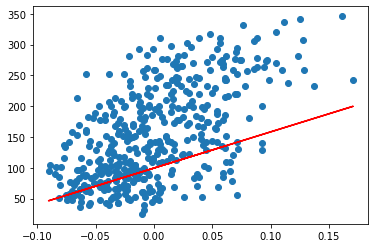

In [77]:
y_pred = x * w + b
# 시각화
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()

### 약간 애매하게 그려짐 > 에포크를 안 해서

In [86]:
# do epochs: w와 b를 반복적으로 계산해보기
# 오차를 계산하고 오차를 저장하고 오차를 계속 계산하고 오차를 저장하면서 가중치와 편향을 업데이트하기

for _ in range(100):
  for x_i, y_i in zip(x, y):
    y_pred = x_i * w + b
    y_pred_error = y_i - y_pred
    w = w + x_i * y_pred_error
    b = b + 1 * y_pred_error

print(w, b)

913.5973364345905 123.39414383177204


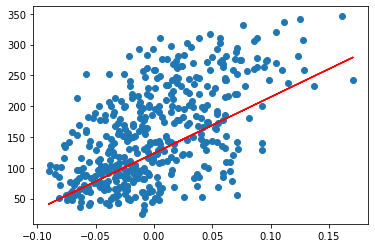

In [80]:
y_pred = x * w + b
# 시각화
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()

### 올ㅋ 좀 더 나아짐
> y^ = 913.6X + 123.4

In [87]:
# 모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


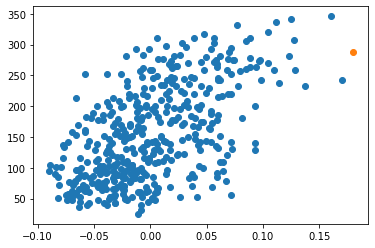

In [92]:
# 예측한 값 시각화
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.show()

---
# 모델 만들기 정리
1. w와 b를 임의의 값(1, 1)으로 초기화하고 훈련데이터의 샘플을 하나씩 대입해 y와 y^의 오차를 구한다.
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트한다.(학습한다)
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트가 된다.
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b는 더 커지도록 업데이트가 된다.

# 쉽게 사용하기 위해 Class 만들기 > .py로 저장해놓고 쓰면 좋다

In [95]:
class LRModel:
  # w와 b를 초기화하기
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  # 정방향 계산
  def forpass(self, x):
    y_hat = self.w * x + self.b
    return y_hat # 직선방정식을 계산해 y^을 return

  # 역방향 계산
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그래디언트 계산
    b_grad = 1 * err # 편향에 대한 그래디언트 계산
    return w_grad, b_grad

  # 훈련
  def fit(self, x, y, epoch):
    for _ in range(epoch):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = y_i - y_hat
        w_grad, b_grad = self.backprop(x_i, err)
        self.w += w_grad
        self.b += b_grad
    return self.w, self.b


In [105]:
lrmodel = LRModel()
w, b = lrmodel.fit(x, y, epoch=10)
print(w, b)

913.5656499923714 123.39181064719298


---
# 용어정리
### 선형 회귀
- 선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로, 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있음
- 머신러닝 알고리즘이지만 딥러닝에서 사용하는 인공신경망 알고리즘의 기초가 됨

### 경사 하강법
- 최적화 알고리즘 중의 하나로, 핵심 훈련 알고리즘
- 최적의 모델을 만드는 가중치를 한 번에 찾지 않음
- 먼저 임의로 정한 가중치에서 출력을 만든 후, 타깃과 비교하여 오차를 줄이는 방향으로 가중치 조정
- 이런 과정의 모든 훈련샘플에 대해 반복하면서 최적의 가중치를 찾음

### 손실함수
- 모델이 얼마만큼의 오류가 있는지 측정하는 기준
- 손실함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적
- 다른 말로는 비용함수(Cost Function) 또는 목적함수(Objective Function - 잘 안 쓰는 표현)라고도 부름